In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 타이타닉 데이터 생존자 수 예측하기

In [2]:
train = pd.read_csv("./titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("./titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

# bar_chart 함수를 따로 만들어서 어떤 feature에서 생존자가 더 많았는지 확인

In [5]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index = ["survived", "dead"])
    df.plot.bar(stacked = True, figsize = (10, 5))
    plt.legend(loc = (1.2, 0.5))
    plt.show()

# 여성이 남성보다 많이 살아 남았다.

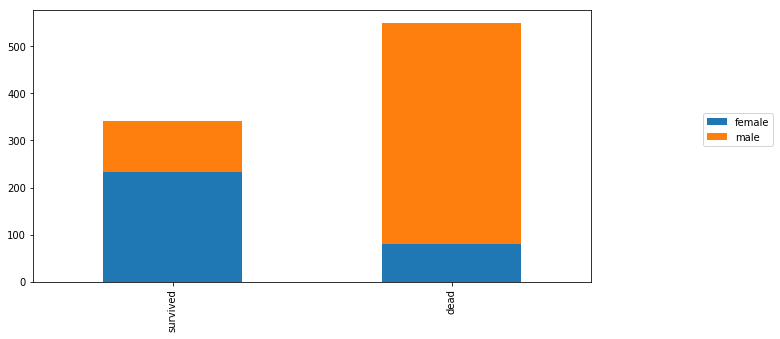

In [6]:
bar_chart("Sex")

# 상위 계층일수록 더 많이 살아남았다 (돈이 많은 사람이 더 많이 살아남음)

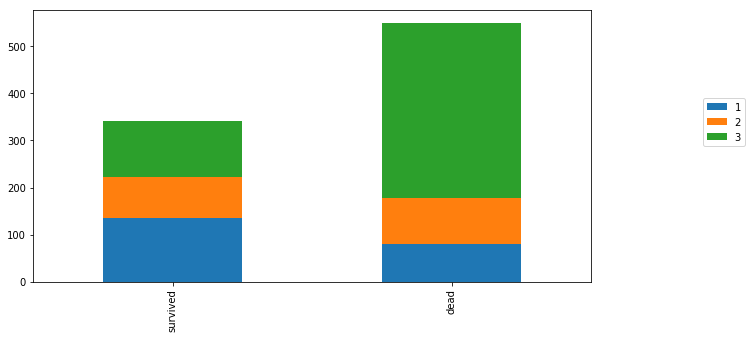

In [7]:
bar_chart("Pclass")

# 데이터 전처리(결측치 찾기)

In [8]:
train_judge = train.isna().sum() / len(train)
train_judge

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
test_judge = test.isna().sum() / len(test)
test_judge

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

# train data 결측치 처리 Cabin

In [10]:
del train["Cabin"]

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# train data 결측치 처리 Embarked

In [12]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [14]:
train[train.Embarked.isna()] = train[train.Embarked.isna()].fillna("S")

# testdata 결측치 처리 Cabin

In [15]:
del test["Cabin"]

In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [17]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

# testdata 결측치 처리 Fare

In [18]:
test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [19]:
test[["Fare", "Pclass"]].groupby("Pclass").mean() #각 Pclass마다 Fare의 평균을 구해준다. 왜냐하면 Pclass는 생존여부에 영향을 미치기 때문이다.

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [20]:
test[test.Fare.isna()] = test[test.Fare.isna()].fillna(12.459678)

# name값 추출하기(정규표현식 이용)

In [21]:
train_and_test = [train, test] # 리스트 형으로 train test 데이터 한번에 묶어주기

In [22]:
for dataset in train_and_test:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.')

In [23]:
del train["Name"]
del test["Name"]

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,S,Mrs


In [26]:
pd.crosstab(train.Title, train.Sex) # 추출한 이름 정보를 가지고 성별 추론

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
#추출한 이름정보를 가지고 공통부분으로 바꿔줌
for dataset in train_and_test:
    dataset["Title"] = dataset["Title"].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer','Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")

In [28]:
train[["Title", "Survived"]].groupby("Title").mean()#이름 정보에 따른 생존 여부를 확률로 표현

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Other,0.347826


# Age결측치 처리하기

In [29]:
#각 Pclass마다 나이 평균 확인하기
for dataset in train_and_test:
    print(dataset[["Age", "Pclass"]].groupby("Pclass").mean())

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620
              Age
Pclass           
1       40.918367
2       28.777500
3       24.027945


In [30]:
train[(train.Pclass == 1) & (train["Age"].isna())] = train[(train.Pclass == 1) & (train["Age"].isna())].fillna(38.233441)
train[(train.Pclass == 2) & (train["Age"].isna())] = train[(train.Pclass == 2) & (train["Age"].isna())].fillna(29.877630)
train[(train.Pclass == 3) & (train["Age"].isna())] = train[(train.Pclass == 3) & (train["Age"].isna())].fillna(25.140620)

In [31]:
test[(test.Pclass == 1) & (test["Age"].isna())] = test[(test.Pclass == 1) & (test["Age"].isna())].fillna(40.918367)
test[(test.Pclass == 2) & (test["Age"].isna())] = test[(test.Pclass == 2) & (test["Age"].isna())].fillna(28.777500)
test[(test.Pclass == 3) & (test["Age"].isna())] = test[(test.Pclass == 3) & (test["Age"].isna())].fillna(24.027945)

In [32]:
#나이 구간을 5칸으로 자름
for dataset in train_and_test:
    dataset["AgeGroup"] = pd.cut(dataset.Age, 5)

In [33]:
np.sort(train.AgeGroup.unique())

array([Interval(0.34, 16.336, closed='right'),
       Interval(16.336, 32.252, closed='right'),
       Interval(32.252, 48.168, closed='right'),
       Interval(48.168, 64.084, closed='right'),
       Interval(64.084, 80.0, closed='right')], dtype=object)

In [34]:
np.sort(test.AgeGroup.unique())

array([Interval(0.0942, 15.336, closed='right'),
       Interval(15.336, 30.502, closed='right'),
       Interval(30.502, 45.668, closed='right'),
       Interval(45.668, 60.834, closed='right'),
       Interval(60.834, 76.0, closed='right')], dtype=object)

In [35]:
#구간별로 숫자데이터로 바꿔줌
train["Age"].loc[train.Age <= 16] = 0
train["Age"].loc[(train.Age > 16) & (train.Age <= 32)] = 1
train["Age"].loc[(train.Age > 32) & (train.Age <= 48)] = 2
train["Age"].loc[(train.Age > 48) & (train.Age <= 64)] = 3
train["Age"].loc[train.Age > 64] = 4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
test["Age"].loc[test.Age <= 15] = 0
test["Age"].loc[(test.Age > 15) & (test.Age <= 30)] = 1
test["Age"].loc[(test.Age > 30) & (test.Age <= 45)] = 2
test["Age"].loc[(test.Age > 45) & (test.Age <= 60)] = 3
test["Age"].loc[test.Age > 60] = 4

In [37]:
#필요없는 agegroup삭제
del train["AgeGroup"]
del test["AgeGroup"]

In [38]:
#title과 ticket 데이터 삭제
for dataset in train_and_test:
    del dataset["Title"]
    del dataset["Ticket"]

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1.0,1,0,7.2500,S
1,2,1,1,female,2.0,1,0,71.2833,C
2,3,1,3,female,1.0,0,0,7.9250,S
3,4,1,1,female,2.0,1,0,53.1000,S
4,5,0,3,male,2.0,0,0,8.0500,S


# Fare값 전처리 하기

In [40]:
np.sort(pd.cut(train.Fare, 4).unique())

array([Interval(-0.512, 128.082, closed='right'),
       Interval(128.082, 256.165, closed='right'),
       Interval(256.165, 384.247, closed='right'),
       Interval(384.247, 512.329, closed='right')], dtype=object)

In [41]:
np.sort(pd.cut(test.Fare, 4).unique())

array([Interval(-0.512, 128.082, closed='right'),
       Interval(128.082, 256.165, closed='right'),
       Interval(256.165, 384.247, closed='right'),
       Interval(384.247, 512.329, closed='right')], dtype=object)

In [42]:
for dataset in train_and_test:
    dataset["Fare"].loc[dataset["Fare"] <= 128.082] = 0
    dataset["Fare"].loc[(dataset["Fare"] > 128.082) & (dataset["Fare"] < 256.165)] = 1
    dataset["Fare"].loc[(dataset["Fare"] >= 256.165) & (dataset["Fare"] < 384.247)] = 2
    dataset["Fare"].loc[dataset["Fare"] >= 384.247] = 3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Parch변수와 Sibsp변수를 합하여 정리하기

In [43]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,1.0,1,0,0.0,S,1
1,2,1,1,female,2.0,1,0,0.0,C,1
2,3,1,3,female,1.0,0,0,0.0,S,0
3,4,1,1,female,2.0,1,0,0.0,S,1
4,5,0,3,male,2.0,0,0,0.0,S,0


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,male,2.0,0,0,0.0,Q,0
1,893,3,female,3.0,1,0,0.0,S,1
2,894,2,male,4.0,0,0,0.0,Q,0
3,895,3,male,1.0,0,0,0.0,S,0
4,896,3,female,1.0,1,1,0.0,S,2


In [46]:
#필요없는 feature들 삭제
for dataset in train_and_test:
    del dataset["SibSp"]
    del dataset["Parch"]

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,male,1.0,0.0,S,1
1,2,1,1,female,2.0,0.0,C,1
2,3,1,3,female,1.0,0.0,S,0
3,4,1,1,female,2.0,0.0,S,1
4,5,0,3,male,2.0,0.0,S,0


In [48]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,male,2.0,0.0,Q,0
1,893,3,female,3.0,0.0,S,1
2,894,2,male,4.0,0.0,Q,0
3,895,3,male,1.0,0.0,S,0
4,896,3,female,1.0,0.0,S,2


In [49]:
del train["PassengerId"]

In [50]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,1.0,0.0,S,1
1,1,1,female,2.0,0.0,C,1
2,1,3,female,1.0,0.0,S,0
3,1,1,female,2.0,0.0,S,1
4,0,3,male,2.0,0.0,S,0


# 데이터 모델링 하기
## 랜덤포레스트 알고리즘 -> 앙상블 기법의 한 종류
### 실제 랜덤포레스트의 모델을 도식화 시킴
<img src = "./RandomForest.JPG">

In [51]:
#train data One-Hot-encoding하기
train = pd.get_dummies(train)
train.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,0.0,1,0,1,0,0,1
1,1,1,2.0,0.0,1,1,0,1,0,0
2,1,3,1.0,0.0,0,1,0,0,0,1
3,1,1,2.0,0.0,1,1,0,0,0,1
4,0,3,2.0,0.0,0,0,1,0,0,1


In [52]:
#test data One-Hot-encoding하기
test = pd.get_dummies(test)
test.head()

,PassengerId,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,2.0,0.0,0,0,1,0,1,0
1,893,3,3.0,0.0,1,1,0,0,0,1
2,894,2,4.0,0.0,0,0,1,0,1,0
3,895,3,1.0,0.0,0,0,1,0,0,1
4,896,3,1.0,0.0,2,1,0,0,0,1


In [53]:
X_train = train.drop("Survived", axis = 1).values #y값을 제외한 나머지 값을 x변수로 두겠다.
target_label = train["Survived"].values.reshape(-1, 1)#y값만 y변수로 두겠다. 단 이때 shape을 조정

In [54]:
X_test = test.drop("PassengerId", axis = 1).copy().values #test하는 데이터들을 x값으로 만들어줌

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_class = RandomForestClassifier(n_estimators=100)

In [59]:
rf_class.fit(X_tr, y_tr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pred = rf_class.predict(X_vld)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
#정확도 84%나옴 로지스틱 회귀로 분석했을때보다 성능이 더 좋아짐
accuracy_score(y_pred, y_vld)

0.8432835820895522

In [63]:
predict = rf_class.predict(X_test)

In [64]:
#제출 파일 만들기
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": predict})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [65]:
submission.to_csv("./submisson_rf.csv", index = False)

# 1.가설 설정을 통해 검증
# 2. 결측치 찾기
# 3. 기계가 문자를 인식 못하기 때문에 여러가지 기법을 써서 숫자로 나타내기
# 4. 여러 알고리즘을 통해 성능이 좋은 것을 찾아냄(처음 분석할땐 로지스틱회귀로 시작 -> 앙상블 모델인 랜덤포레스트로 마무리)